In [1]:
import pandas as pd
import os
pd.set_option('display.max_colwidth', None)
from hack_triage import *
%matplotlib inline


In [2]:
years2_dict = {
    '2025-04-01': 'April 2025',
    '2025-03-01': 'March 2025',
    '2025-02-01': 'February 2025',
    '2025-01-01': 'January 2025',
    '2024-12-01': 'December 2024',
    '2024-11-01': 'November 2024',
    '2024-10-01': 'October 2024',
    '2024-09-01': 'September 2024',
    '2024-08-01': 'August 2024',
    '2024-07-01': 'July 2024',
    '2024-06-01': 'June 2024',
    '2024-05-01': 'May 2024',
}


In [5]:
final_df = pd.DataFrame()
for date, month_year in years2_dict.items():
    print(month_year)
    # Configure analysis parameters
    symbols = {
        'BTC': [90, 30, 15],
        # 'ETH': [90, 30, 15],
    }
    
    # Fetch data
    market_data = fetch_market_data(symbols, end_date=pd.to_datetime(date))
    stats_df = calculate_statistics(market_data)
    
    stats_df['month_year'] = month_year
    stats_df['date'] = date
    temp_df = stats_df[['symbol','date','month_year','days','t_95_start','t_95_end','close','mean','z_score']].copy()
    final_df = pd.concat([final_df, temp_df], ignore_index=True)
    

April 2025
March 2025
February 2025
January 2025
December 2024
November 2024
October 2024
September 2024
August 2024
July 2024
June 2024
May 2024


In [6]:
stats_df

,symbol,days,close,mean,std_dev,variance,cv,skewness,kurtosis,t_70_start,t_70_end,t_95_start,t_95_end,z_score,month_year,date
0,BTC,15,60188.84,63879.49,1790.57,3206137.76,0.03,-0.18,-0.30,61952.33,65806.64,60039.10,67719.88,-2.06,May 2024,2024-05-01
1,BTC,30,60188.84,65736.32,2902.76,8425998.68,0.04,0.28,-0.72,62673.03,68799.60,59799.51,71673.12,-1.91,May 2024,2024-05-01
2,BTC,90,60188.84,61300.79,8755.64,76661272.28,0.14,-0.80,-0.66,52172.96,70428.61,43903.51,78698.06,-0.13,May 2024,2024-05-01


In [7]:
final_df.to_csv("tdistribution_btc.csv",index=False)

In [8]:
final_df

,symbol,date,month_year,days,t_95_start,t_95_end,close,mean,z_score
0,BTC,2025-04-01,April 2025,15,80843.76,88685.00,83078.37,84764.38,-0.92
1,BTC,2025-04-01,April 2025,30,78994.25,91091.03,83078.37,85042.64,-0.66
2,BTC,2025-04-01,April 2025,90,78573.62,108138.22,83078.37,93355.92,-1.38
3,BTC,2025-03-01,March 2025,15,81133.70,105218.86,85583.85,93176.28,-1.35
4,BTC,2025-03-01,March 2025,30,85474.69,105813.59,85583.85,95644.14,-2.02
5,BTC,2025-03-01,March 2025,90,88967.50,106873.38,85583.85,97920.44,-2.74
6,BTC,2025-02-01,February 2025,15,99900.40,107015.89,102475.91,103458.14,-0.59
7,BTC,2025-02-01,February 2025,30,92163.42,108293.91,102475.91,100228.67,0.57
8,BTC,2025-02-01,February 2025,90,80060.53,111590.17,102475.91,95825.35,0.84
9,BTC,2025-01-01,January 2025,15,90027.53,103045.66,93637.95,96536.60,-0.96


In [9]:
import seaborn as sns

In [10]:
df = final_df.copy()

In [11]:
df

,symbol,date,month_year,days,t_95_start,t_95_end,close,mean,z_score
0,BTC,2025-04-01,April 2025,15,80843.76,88685.00,83078.37,84764.38,-0.92
1,BTC,2025-04-01,April 2025,30,78994.25,91091.03,83078.37,85042.64,-0.66
2,BTC,2025-04-01,April 2025,90,78573.62,108138.22,83078.37,93355.92,-1.38
3,BTC,2025-03-01,March 2025,15,81133.70,105218.86,85583.85,93176.28,-1.35
4,BTC,2025-03-01,March 2025,30,85474.69,105813.59,85583.85,95644.14,-2.02
5,BTC,2025-03-01,March 2025,90,88967.50,106873.38,85583.85,97920.44,-2.74
6,BTC,2025-02-01,February 2025,15,99900.40,107015.89,102475.91,103458.14,-0.59
7,BTC,2025-02-01,February 2025,30,92163.42,108293.91,102475.91,100228.67,0.57
8,BTC,2025-02-01,February 2025,90,80060.53,111590.17,102475.91,95825.35,0.84
9,BTC,2025-01-01,January 2025,15,90027.53,103045.66,93637.95,96536.60,-0.96


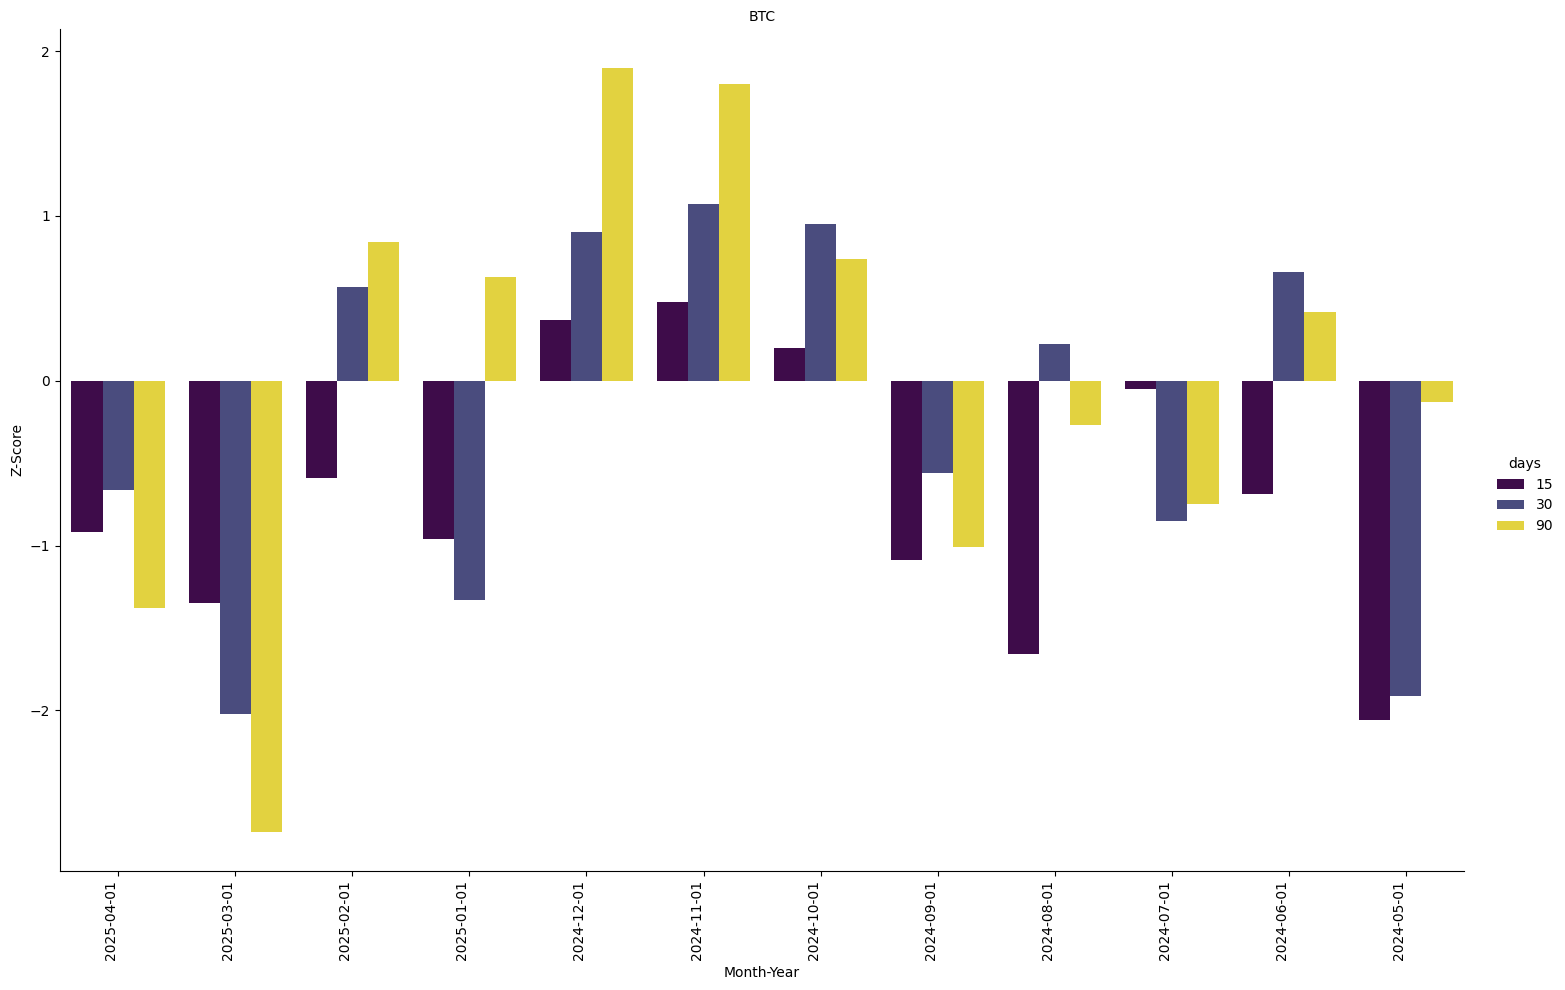

In [12]:
# Ensure month_year is properly sorted in ascending order
df['month_year'] = pd.Categorical(df['month_year'], 
                                  categories=sorted(df['month_year'].unique()), 
                                  ordered=True)

# Create the catplot with rows
g = sns.catplot(
    data=df,
    x='date',
    y='z_score',
    hue='days',
    row='symbol',  # Add rows based on the "date" column
    kind='bar',
    palette='viridis',
    height=10,
    aspect=1.5,
    sharey=False,
    sharex=False,
)

# Customize labels and titles
g.set_axis_labels("Month-Year", "Z-Score")
g.set_titles("{row_name}")
g.set_xticklabels(rotation=90, horizontalalignment='right')
g.tight_layout()

# Show the plot
plt.show()